In [2]:
import gmsh
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,8))
gmsh.initialize()
gmsh.model.add('chapa con agujero')

In [3]:
f_mallado =0.5
L=5
p1 = gmsh.model.geo.addPoint(0, 0, 0, f_mallado)
p2 = gmsh.model.geo.addPoint(0, L, 0, f_mallado) 
p3 = gmsh.model.geo.addPoint(2*L, L, 0, f_mallado) 
p4 = gmsh.model.geo.addPoint(2*L, 0, 0, f_mallado)

In [4]:
r = 1
f_malladoc = 0.1 
p5 = gmsh.model.geo.addPoint(0,r,0,f_malladoc)
p6 = gmsh.model.geo.addPoint(r,0,0,f_malladoc)

In [5]:
l1 = gmsh.model.geo.addLine(p5, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p6)

semi1 = gmsh.model.geo.addCircleArc(p5,p1 ,p6) 


C1 = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])
C2 = gmsh.model.geo.addCurveLoop([semi1])

S1 = gmsh.model.geo.addPlaneSurface([C1,C2]) 

In [6]:
gmsh.model.geo.synchronize()

In [7]:
Empotradoy=gmsh.model.addPhysicalGroup(1,[l4])
gmsh.model.setPhysicalName(1,Empotradoy,'Empotradoy')

Traccionado=gmsh.model.addPhysicalGroup(1,[l3])
gmsh.model.setPhysicalName(1,Traccionado,'Traccionado')

Empotradox=gmsh.model.addPhysicalGroup(1,[l1])
gmsh.model.setPhysicalName(1,Empotradox,'Empotrado x')

Superficie = gmsh.model.addPhysicalGroup(2,[S1])
gmsh.model.setPhysicalName(2,Superficie, 'Superficie')

NodoAgujero= gmsh.model.addPhysicalGroup(0, [p1])
gmsh.model.setPhysicalName(0, NodoAgujero, 'Nodo agujero')

In [8]:
gmsh.model.mesh.generate(2)
gmsh.fltk.run()

In [9]:
NodeInfo = gmsh.model.mesh.get_nodes()
NumeroNodos=NodeInfo[0].shape[0]
MN=NodeInfo[1].reshape(NumeroNodos,3)

In [10]:
ETAGS,ELEMENTS=gmsh.model.mesh.get_elements_by_type(2)
MC=ELEMENTS.reshape([ETAGS.shape[0],3])
MC=(MC-1).astype(int)
print(MC)

[[464 342 601]
 [302 254 387]
 [348 349 536]
 ...
 [628 399 641]
 [584 532 658]
 [161 584 658]]


In [11]:
NodosEmpotrados=gmsh.model.mesh.get_nodes_for_physical_group(1,Empotradox)
NodosEmpotrados2=gmsh.model.mesh.get_nodes_for_physical_group(1,Empotradoy)

s1=NodosEmpotrados[0].reshape(len(NodosEmpotrados[0]),1) 
s2=NodosEmpotrados2[0].reshape(len(NodosEmpotrados2[0]),1) 
S=np.vstack((s1,s2))
z=np.zeros([len(NodosEmpotrados[0])+len(NodosEmpotrados2[0]),2])
MNE=np.concatenate((S-1,z),axis=1)
MNE=MNE.astype(int) 

NodosTraccionados=gmsh.model.mesh.get_nodes_for_physical_group(1,Traccionado)

s=NodosTraccionados[0].reshape(len(NodosTraccionados[0]),1).astype(int)
z=np.zeros([len(NodosTraccionados[0]),2]).astype(int)
MNT=np.concatenate((s-1,z),axis=1)

In [12]:
MNE

array([[ 1,  0,  0],
       [ 4,  0,  0],
       [ 6,  0,  0],
       [ 7,  0,  0],
       [ 8,  0,  0],
       [ 9,  0,  0],
       [10,  0,  0],
       [11,  0,  0],
       [12,  0,  0],
       [13,  0,  0],
       [14,  0,  0],
       [15,  0,  0],
       [16,  0,  0],
       [17,  0,  0],
       [18,  0,  0],
       [19,  0,  0],
       [20,  0,  0],
       [21,  0,  0],
       [ 3,  0,  0],
       [ 5,  0,  0],
       [50,  0,  0],
       [51,  0,  0],
       [52,  0,  0],
       [53,  0,  0],
       [54,  0,  0],
       [55,  0,  0],
       [56,  0,  0],
       [57,  0,  0],
       [58,  0,  0],
       [59,  0,  0],
       [60,  0,  0],
       [61,  0,  0],
       [62,  0,  0],
       [63,  0,  0],
       [64,  0,  0],
       [65,  0,  0],
       [66,  0,  0],
       [67,  0,  0],
       [68,  0,  0],
       [69,  0,  0],
       [70,  0,  0],
       [71,  0,  0],
       [72,  0,  0],
       [73,  0,  0],
       [74,  0,  0],
       [75,  0,  0],
       [76,  0,  0],
       [77,  

In [13]:
entityTraccionada=gmsh.model.getEntitiesForPhysicalGroup(1,Traccionado)
Tgroup,Ttraccionada,Ltraccionada=gmsh.model.mesh.getElements(1,entityTraccionada[0])
Ltraccionada=Ltraccionada[0].reshape(Ttraccionada[0].shape[0],2) 

Longitudes=np.abs(MN[Ltraccionada[:,0]-1,1]-MN[Ltraccionada[:,1]-1,1])
t=1 #[inch]
Tension_ext=1000/L
for l,linea in enumerate(Ltraccionada-1):
    n1 = int(linea[0])   
    n2 = int(linea[1])
    flocal=Tension_ext*Longitudes[l]*t/2
    flocal=round(flocal)
    MNT[MNT[:,0]==n1,1] += flocal
    MNT[MNT[:,0]==n2,1] += flocal
    
    
print(MNT)

[[  2  50   0]
 [  3  50   0]
 [ 41 100   0]
 [ 42 100   0]
 [ 43 100   0]
 [ 44 100   0]
 [ 45 100   0]
 [ 46 100   0]
 [ 47 100   0]
 [ 48 100   0]
 [ 49 100   0]]


In [14]:
np.set_printoptions(precision = 4, linewidth = 132)
cp=0.3
E=30E6 #[Psi]

nb=len(MNE)
nc=len(MNT)

D=np.array([[1,cp,0],
            [cp,1,0],
            [0,0,0.5*(1-cp)]] )*E/(1-cp**2)
n=len(MN)
x=np.arange(n) 
x=np.delete(x,[np.concatenate((MNE[:,0].astype(int),MNT[:,0].astype(int)))]) 

In [15]:
kglobal=np.zeros([len(MN)*2,len(MN)*2])
B=[]
for i in range (len(MC)):
    A=np.linalg.det([[1,MN[MC[i,0],0],MN[MC[i,0],1]],
                    [1,MN[MC[i,2],0],MN[MC[i,2],1]],
                    [1,MN[MC[i,1],0],MN[MC[i,1],1]]])/2
    
    
    bi=MN[MC[i,2],1]-MN[MC[i,1],1]
    gi=MN[MC[i,1],0]-MN[MC[i,2],0]
    
    bj=MN[MC[i,1],1]-MN[MC[i,0],1]
    gj=MN[MC[i,0],0]-MN[MC[i,1],0]
    
    bm=MN[MC[i,0],1]-MN[MC[i,2],1]
    gm=MN[MC[i,2],0]-MN[MC[i,0],0]
    
    B.append(np.array([[bi,0,bj,0,bm,0],
                       [0,gi,0,gj,0,gm],
                       [gi,bi,gj,bj,gm,bm]])*(1/(2*A)))
    

    k= t * abs(A) * (np.dot(np.transpose(B[i]), np.dot(D,B[i])))
    
    i,m,j = MC[i,:]    
    index=np.array([i*2,i*2+1,j*2,j*2+1,m*2,m*2+1])
    kglobal[np.ix_(index,index)]+=k



    
    

    

print(kglobal*(0.91/375000))

[[  0.       0.       0.     ...   0.       0.       0.    ]
 [  0.       0.       0.     ...   0.       0.       0.    ]
 [  0.       0.      43.2457 ...   0.       0.       0.    ]
 ...
 [  0.       0.       0.     ... 185.4402   0.       0.    ]
 [  0.       0.       0.     ...   0.     187.1602  -9.4351]
 [  0.       0.       0.     ...   0.      -9.4351 213.1054]]


In [16]:
f=np.zeros([2*n,2])

for i in range (nc):
    s=MNT[i,0]
    f[2*s,0]=1
    f[2*s,1]=MNT[i,1]
    f[2*s+1,0]=1
    f[2*s+1,1]=MNT[i,2]
    

for j in range (nb):
    if MNE[j,1]==1:
        s=MNE[j,0]
        f[2*s,0]=1
        f[2*s,1]=0
    if MNE[j,2]==1:
        s=MNE[j,0]
        f[2*s+1,0]=1
        f[2*s+1,1]=0
if nb+nc <n:
    f[2*x,0]=1
    f[2*x,1]=0
    f[2*x+1,0]=1
    f[2*x+1,1]=0

In [17]:
_FX=f[0:-1:2,1].reshape(-1,1).copy()    

_FY =f[1::2,1].reshape(-1,1).copy()

(-1.0, 30.0)

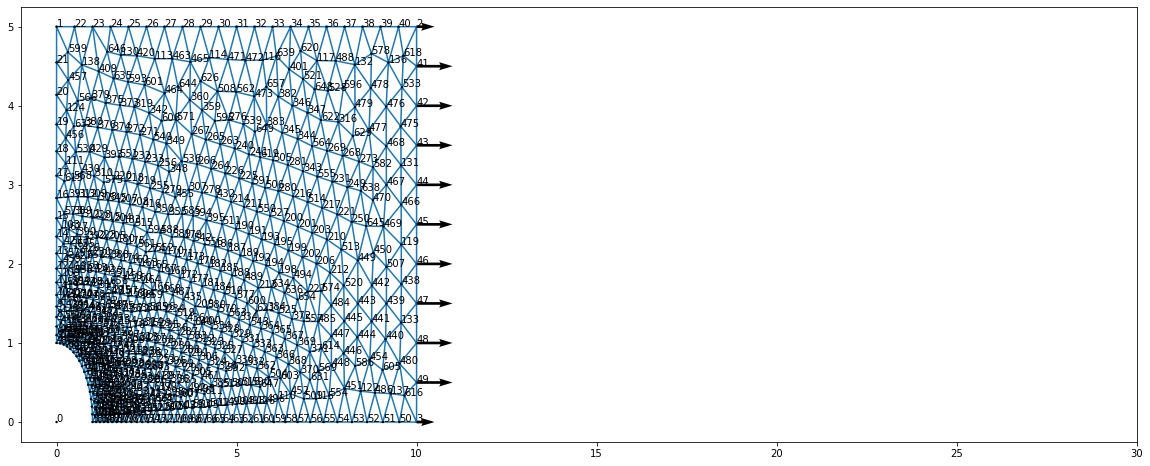

In [18]:
fig, ax = plt.subplots()
_ax = ax.triplot(MN[:,0], MN [:,1], MC)
_ax = ax.quiver(MN[:,0], MN[:,1], _FX, _FY,scale=100, units='x')
for n in range(NumeroNodos):
    ax.annotate('{:d}'.format(n), MN[n,:2], fontsize=10)
ax.set_xlim([-1,30])

In [19]:
agujero1 = 2 * (gmsh.model.mesh.get_nodes_for_physical_group(0,NodoAgujero)[0] - 1).astype(int)
agujero2= (2 * (gmsh.model.mesh.get_nodes_for_physical_group(0,NodoAgujero)[0] - 1) + 1).astype(int)
Smx = 2 * (gmsh.model.mesh.get_nodes_for_physical_group(1,Empotradox)[0] - 1).astype(int)
Smy = (2 * (gmsh.model.mesh.get_nodes_for_physical_group(1,Empotradoy)[0] - 1) +1).astype(int)

In [20]:
indexd=np.sort( np.hstack((agujero1,agujero2,Smx,Smy)))
indexf = np.delete( np.arange(2*NumeroNodos) , indexd)

In [21]:
desplazamientos=np.dot(np.linalg.inv(kglobal[np.ix_(indexf,indexf)]),f[indexf,1])


d=np.zeros([2*NumeroNodos,2])
d[indexd,0]=1 
d[indexf,1]=desplazamientos
f[:,1]=np.dot(kglobal,d[:,1]) 

In [22]:
tension=[]
for s in range (len(MC)) :
    i,m,j = MC[s,:]    
    index=np.array([i*2,i*2+1,j*2,j*2+1,m*2,m*2+1])
    valor=np.dot(np.dot(B[s],d[index,1]),D)
    tension.append(valor)
tension = np.array(tension)

In [23]:
tensionmax=[]
tensionmin=[]
for p in range (len(tension)):
    valor=(tension[p,0]+tension[p,1])/2+np.sqrt(((tension[p,0]-tension[p,1])/2)**2+tension[p,2]**2)
    valor2=(tension[p,0]+tension[p,1])/2-np.sqrt(((tension[p,0]-tension[p,1])/2)**2+tension[p,2]**2)

    tensionmax.append(valor)
    tensionmin.append(valor2)

tensionmax = np.array(tensionmax)
tensionmin = np.array(tensionmin)

In [24]:
Despx = d[:-1:2,1].reshape(-1,1)
Despy = d[1::2,1].reshape(-1,1)

In [25]:
DESP=np.hstack((Despx,Despy,np.zeros([NumeroNodos,1])))

In [26]:
desps = gmsh.view.add("desplazamientos")

In [27]:
Desps = gmsh.view.addModelData(desps, 0, 'chapa con agujero', 'NodeData', NodeInfo[0], DESP, numComponents=3)

In [28]:
Tensiones=gmsh.view.add('Tensiones principales')

In [29]:
Tensiones = gmsh.view.addModelData(Tensiones, 0, 'chapa con agujero', 'ElementData', ETAGS, tensionmax.reshape(-1,1) , numComponents=1 )

In [30]:
gmsh.fltk.run()

In [31]:
gmsh.finalize()